<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd

In [0]:
prayer_df = pd.read_csv('/content/prayer-sources.csv', 
                        # encoding="latin-1"
                        )
not_prayer_df = pd.read_csv('/content/not-prayer-sources.csv', 
# not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            # encoding="latin-1"
                            )

In [844]:
prayer_df.sample(3)

,Ref,En,He
122,Sanhedrin 22a:7,"The Gemara asks: And with regard to the other Sage, i.e., Rabbi Yehuda HaNasi, who does not hold that the king must write and affix the second scroll to his arm, what does he expound from that ver...","ואידך האי שויתי מאי דריש ביה ההוא מיבעי ליה כדרב חנה בר ביזנא דאמר רב חנה בר ביזנא אר""ש חסידא המתפלל צריך שיראה עצמו כאילו שכינה כנגדו שנאמר שויתי ה' לנגדי תמיד"
980,Berakhot 29b:7-8,"We learned in the mishna that Rabbi Eliezer says: One whose prayer is fixed, his prayer is not supplication. The Gemara asks: What is the meaning of fixed in this context? Rabbi Ya’akov bar Idi sa...",רַבִּי אֱלִיעֶזֶר אוֹמֵר כׇּל הָעוֹשֶׂה תְּפִלָּתוֹ קֶבַע וְכוּ׳: מַאי ״קֶבַע״? אָמַר רַבִּי יַעֲקֹב בַּר אִידֵּי אָמַר רַבִּי אוֹשַׁעְיָא: כֹּל שֶׁתְּפִלָּתוֹ דּוֹמָה עָלָיו כְּמַשּׂוֹי. וְרַבָּנ...
546,"Mishneh Torah, Fasts 4:7-13",And he [then] begins to add six blessings that he adds one after [another]. And he supplicates in each one of them with words of supplication and verses from the [Prophets] and from the [Writings]...,וּמַתְחִיל לְהוֹסִיף שֵׁשׁ בְּרָכוֹת שֶׁהוּא מוֹסִיף זוֹ אַחַר זוֹ. וּמִתְחַנֵּן בְּכָל אַחַת מֵהֶן בְּדִבְרֵי תַּחֲנוּנִים וּפְסוּקִים מִדִּבְרֵי קַבָּלָה וּמִכִּתְבֵי הַקֹּדֶשׁ כְּפִי שֶׁהוּא רָ...


In [845]:
prayer_df['is_prayer'] = 'yes'
prayer_df = prayer_df[['En','is_prayer']]
prayer_df.tail(3)

,En,is_prayer
1049,"It is true that you are the one who judges, and reproves, who knows all, and bears witness, who inscribes, and seals, who reckons and enumerates. You remember all that is forgotten. You open the b...",yes
1050,"In these Berachot (blessings) we bow down: the first Beracha (blessing) [of Shemoneh Esreh], in the beginning and at the end, and in [the paragraph of] Modim [in Shemoneh Esreh], in the beginning ...",yes
1051,"On seeds he says [the Beracha (blessing)] Borei Minei Zerayim (Who created different types of seeds), and on herbs he says [the Beracha] Borei Minei Deshaim (Who created different types of herbs),...",yes


In [846]:
not_prayer_df.sample(3)

,Ref,En,He,Topics
1029,Zohar 1:71b:1,NaN,וְנוּקְבֵי כְּחֲדָא. וְתוּ אֶת נֹחַ לְאַסְגָּאָה נוּקְבֵיהּ. וְאֶת בָּנָיו לְאַסְגָּאָה נוּקְבֵי דִלְהוֹן.,cecum
801,Zohar 2:165b:1,NaN,"עָלֵיהּ. זַכָּאָה חוּלָקֵיהּ דְּהַהוּא בַּר נָשׁ, דְּאוֹשִׁיד דִּמְעִין קָמֵי קוּדְשָׁא בְּרִיךְ הוּא, בִּצְלוֹתֵיהּ.",cecum
627,"Pesach Haggadah, Shulchan Orech 2",We eat and drink.,אוכלים ושותים.,passover|haggadah


In [847]:
not_prayer_df['is_prayer'] = 'no'
not_prayer_df = not_prayer_df[['En','is_prayer']]
not_prayer_df.sample(3)

,En,is_prayer
632,The Gemara presents a mnemonic for the following discussion: Returned; and walk; and converse.,no
19,"And they shall know that I am the LORD their God, that brought them forth out of the land of Egypt, that I may dwell among them. I am the LORD their God.",no
779,"10. When a person is sold to a gentile, he can redeem himself partially, as stated above. Sometimes this will work to his advantage, and sometimes it will work to his disadvantage. How can it work...",no


In [848]:
all_prayer_frames = [prayer_df, not_prayer_df]
all_prayer_df = pd.concat(all_prayer_frames)
all_prayer_df.reset_index(inplace=True)

# all_prayer_df.tail(3)
all_prayer_df.sample(3)
# all_prayer_df.loc[[345]]

,index,En,is_prayer
462,462,NaN,yes
707,707,"It is a rule universally observed in Israel, that the rite of ""falling upon the face"" is not practised on Sabbaths, Festivals, the New Year, the New Moon, Feast of Lights, Feast of Lots, at the af...",yes
1410,358,"The kind of tolerance G-d displays depends on who He needs to relate to. In the first instance there are the spiritual, completely disembodied beings inhabiting the ""upper"" world, who are closest ...",no


In [849]:
del all_prayer_df['index']
all_prayer_df.sample(3)

,En,is_prayer
1179,"Rav Ashi said: What difficulty is there here? Perhaps the mishna is stating the halakha utilizing the following didactic style: It was not necessary, and it should be understood as follows. It was...",no
1261,NaN,no
1362,The Gemara points out that this disagreement between Rava and Rav Safra,no


In [850]:
all_prayer_df.shape

(2103, 2)

In [851]:
print(all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print(all_prayer_df.shape)

(2103, 2)
(1223, 2)


In [852]:
print(all_prayer_df.isnull().sum())
all_prayer_df.dropna(inplace=True)
print(all_prayer_df.isnull().sum())
# all_prayer_df.isnull().sum()
# all_prayer_df.sample(5)

En           2
is_prayer    0
dtype: int64
En           0
is_prayer    0
dtype: int64


In [0]:
all_prayer_df['is_prayer'] = all_prayer_df['is_prayer'].map({'no': 0, 'yes': 1})

In [854]:
all_prayer_df.sample(5)

,En,is_prayer
11,"The dispute between the Rabbis and Rabbi Yehuda with regard to the times beyond which the different prayers may not be recited is rooted in a profound disagreement, also manifest in a later amorai...",1
1775,"The mishna summarizes: If he ate an item that involves performing a mitzva or an item that involves committing a transgression, or if he ate any food in the world but did not eat meat, or if he dr...",0
25,"Rabbi Ḥanina waited for him until he completed his prayer. When he finished, Rabbi Ḥanina asked him: Have you concluded all of the praises of your Master? Why do I need all of this superfluous pra...",1
1048,"We rise to our duty to praise the Master of all, to acclaim the Creator. G-d made our lot unlike that of other people, assigning to us a unique destiny. (For they worship vanity and emptiness, and...",1
1351,"And Rav holds that actually, we also require loose strings in addition to the windings, and when that term “twisted cords” appears in the verse, it comes for the purpose of teaching the number of ...",0


In [857]:
print('Prayer:', (all_prayer_df.is_prayer.values == 1).sum())
print('Not prayer:', (all_prayer_df.is_prayer.values == 0).sum())

Prayer: 553
Not prayer: 668


In [861]:
nltk.download('stopwords')

import nltk
import string

from nltk.corpus import stopwords

whitelist = set('abcdefghijklmnopqrstuvwxyz ZXCVBNMASDFGHJKLQWERTYUIOP')

def process_text(text):
    '''
    1. Keep only letters and spaces
    2. Remove stopwords
    3. Return str of clean text words
    '''
    #1
    chars_str = ''.join(filter(whitelist.__contains__, text))
    #2
    clean_words = [word.lower() for word in chars_str.split() if word.lower() not in stopwords.words('english')]
    #3
    return ' '.join(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [862]:
sample_text = '''aBC.!@#$%^&    c*(בחתו ‎‎‎ או‎ בקרחתו — une...
233 the gns: ac ...
1041    7. a pien p'''
process_text(sample_text)

'abc c une gns ac pien p'

In [863]:
# all_prayer_df['En'].head().apply(process_text)
all_prayer_df['En'] = all_prayer_df['En'].apply(process_text)
all_prayer_df.head()
# all_prayer_df.loc[[345]]


,En,is_prayer
0,another abba binyamins statements regard laws prayer taught baraita abba binyamin says two people enter synagogue outside city order pray one began praying wait person complete prayer left alone s...,1
1,taught baraita abba binyamin said ones prayer fully heard synagogue stated regard king solomons prayer temple yet turned toward prayer servant supplication lord god listen song prayer servant pray...,1
2,additionally ravin bar rav adda said rabbi yitzak said one accustomed come synagogue come one day holy one blessed asks determine happened stated among fears lord hears voice servant though walks ...,1
3,similarly taught baraita rabbi yishmael ben elisha high priest said yom kippur entered innermost sanctum holy holies offer incense vision saw akatriel ya lord hosts one names god expressing ultima...,1
4,meaning written let prayer unto lord time favor god abundance mercy answer truth salvation psalms appears individual praying prayers coincide special time divine favor time favor time congregation...,1


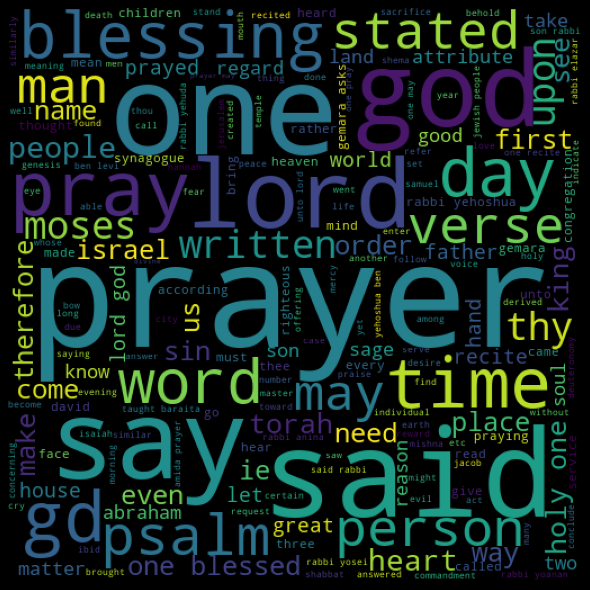

In [866]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 1]['En']))
prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

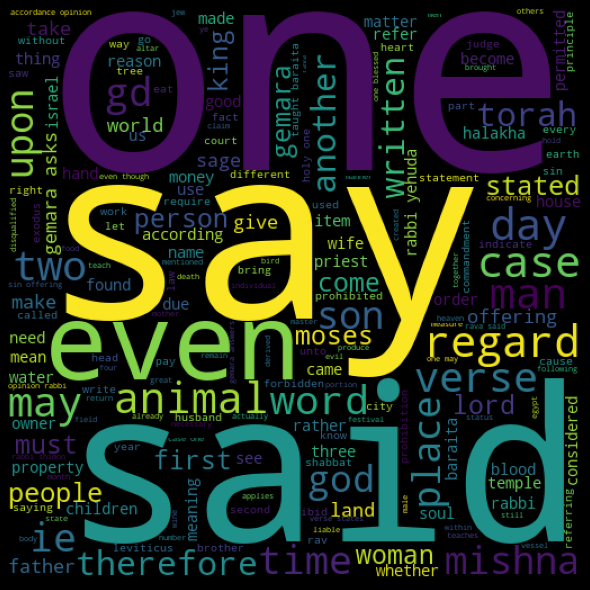

In [867]:
not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 0]['En']))
not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [869]:
X = all_prayer_df.En
y = all_prayer_df.is_prayer
print(X.shape)
print(y.shape)

(1221,)
(1221,)


In [870]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(915,)
(306,)
(915,)
(306,)


In [0]:
# Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# vectorizer = CountVectorizer(analyzer=process_text)
# vectorizer = CountVectorizer(ngram_range=(2, 4))
# vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
vectorizer = TfidfVectorizer(ngram_range=(2, 4))
# vectorizer.fit(X_train)

In [873]:

# X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
X_train_dtm

# prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])

<915x171206 sparse matrix of type '<class 'numpy.float64'>'
	with 191003 stored elements in Compressed Sparse Row format>

In [874]:
X_test_dtm = vectorizer.transform(X_test)
X_test_dtm


<306x171206 sparse matrix of type '<class 'numpy.float64'>'
	with 10806 stored elements in Compressed Sparse Row format>

In [879]:


from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB

classifier = MultinomialNB()
# classifier = ComplementNB()

# for Gaussian need array format
# X_train = X_train.toarray()
# X_test = X_test.toarray()
# classifier = GaussianNB()
# classifier = BernoulliNB()

%time classifier.fit(X_train_dtm, y_train)

CPU times: user 13.9 ms, sys: 991 µs, total: 14.9 ms
Wall time: 14.3 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [880]:
y_pred_class = classifier.predict(X_test_dtm)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8006535947712419

In [881]:
print(y_test.value_counts())
# print(y_test.value_counts()[0])


0    166
1    140
Name: is_prayer, dtype: int64


In [884]:
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)


Null accuracy: 0    0.542484
Name: is_prayer, dtype: float64


In [885]:
negs = y_test.value_counts()[0]
poss = y_test.value_counts()[1]
print('Manual null accuracy:',(1 / (1 + negs/poss)))


Manual null accuracy: 0.457516339869281


In [886]:
metrics.confusion_matrix(y_test, y_pred_class)


array([[140,  26],
       [ 35, 105]])

In [0]:
TP = X_test[y_pred + y_test == 2]
TN = X_test[y_pred + y_test == 0]
FP = X_test[y_pred > y_test]
FN = X_test[y_pred < y_test]

In [0]:
pd.options.display.max_colwidth = 100

In [895]:
# print("\n*** TP ***")
# print(TP.sample(5))
# print("\n*** TN ***")
# print(TN.sample(5))
print("\n*** FP ***")
print(FP.sample(10))
print("\n*** FN ***")
print(FN.sample(10))


*** FP ***
2012    moses advisedly concludes saying gd drive enemies instead hint gd alone fighting two tribes fulf...
1726    gemara asks didnt rabbi yehuda bar sheilat say rabbi asi said incident synagogue settlement maon...
1516    known found mercy thee converse thy shekinah us distinguishing signs may wrought us withholdment...
1512    opinion principle divine providence explain principle proceed expound rely demonstrative proof c...
1600    strait called lord answered wide space lord lord fear man lord helpers shall glare hate better t...
2045    rabbi chiya stood started walk weep rabbi yosi joined fasted forty days might see rabbi shimon t...
1486    make thee thine two trumpets silver solid material work artificer shalt thou make let thine conv...
1571    gone city yet far joseph said unto steward follow men thou dost overtake say unto wherefore ye r...
1195    another health recommendation rabbi iyya bar ashi said rav said one accustomed eat small fish co...
1410    kind tol